# Multilayer Perceptron
## Definition 
A feedforward artificial neural network that creates a set of outputs from a set of inputs is known as a multilayer perceptron (MLP). An MLP is defined by numerous layers of input nodes that are linked as a directed graph between the input and output layers. Backpropogation is used by MLP to train the network.

![](https://static.packt-cdn.com/products/9781786468574/graphics/B05474_04_05.jpg)

There are at least three levels of nodes in an MLP: an **input layer**, a **hidden layer**, and an **output layer**. Each node, with the exception of the input nodes, is a neuron with a nonlinear activation function. Backpropagation is a supervised learning technique used by MLP during training. MLP is distinguished from a linear perceptron by its numerous layers and non-linear activation. It can tell the difference between data that isn't linearly separable.

## Notion Summary
* $a_i^{\ell}$: output of a neuron
* $\omega_{ij}^{\ell}$: the weight from mode j to mode i in the $\ell_{th}$ layer
* $z_i^{\ell}$: input of activation function
* $b_i^{\ell}$: the i-th bias in the layer $\ell$

## Layer Output Relation
* from a to z
$$z_i^{\ell} = \omega_{i1}^1a_1^{\ell-1}+\omega_{i2}^1a_2^{\ell-1}+...+b_i^{\ell}$$

* from z to a
$$a_i^{\ell} = \sigma(z_i^{\ell})$$

* General Version
  * $a^0$ = x
  * for $\ell$ = 1 to L
$$\begin{aligned}
z^{\ell} &= W^{\ell}a^{\ell-1}+b^{\ell}\\
a^{\ell}&=\sigma(z^{\ell})\\
a^{\ell}&=\sigma(W^{\ell}a^{\ell-1}+b^{\ell})
\end{aligned}
$$
  * Finish with $a^{\ell}$, our output


## Neural Network Formulation
\begin{aligned}
a^1&=\sigma(W^1x+b^1)\\
a^2&=\sigma(W^2a^1+b^2)\\
& \cdots\\
a^L&=\sigma(W^La^{L-1}+b^L)\\
y&=\sigma(W^L \cdots\sigma(W^2\sigma(W^1x+b^1)+b^2)\cdots+b^L)
\end{aligned}


## Non-Linear Activation Function
* Without non-linearity, deep neural networks work the same as linear transform
$$W_1(W_2\cdot x)=(W_1W_2) x=Wx$$
* With non-linearity, networks with more layers can estimate more complicated function
  * **Sigmoid**: $\text{sigmoid(x)}=\frac{1}{1+e^{-x}}$

  * **tanh**: $\text{tanh(x)}=\frac{sinh(x)}{cosh(x)}=\frac{e^x-e^{-x}}{e^x+e^{-x}}$

  * **Rectified Linear Unit**: ReLU(x) = max(x, 0)

![](https://www.researchgate.net/profile/Hoon-Chung-2/publication/309775740/figure/fig1/AS:538049215381504@1505292337270/The-most-common-nonlinear-activation-functions.png)


##  Cost function
$$C(w,b;x,y)=\frac{1}{2}\sum_{i=1}^n(\alpha_i^L-y_i)^2$$


## Output Error
$$\delta^{\ell-1} = \nabla_{a^{\ell-1}}\ C \otimes \sigma' (z^{\ell-1})$$



## Neuron Error
For $\ell = L-2,\cdots,1$, based on output error, the neuron error is: $$\delta^{\ell}=\bigg(\big(w^{\ell+1}\big) ^T\delta^{\ell+1}\bigg) \otimes\sigma'(z^{\ell})$$


## The Gradient Approximation Update Rule
  \begin{aligned}
\frac{\partial C}{\partial w^{\ell}}&=\delta^{\ell}(a^{\ell-1})^T\\
\frac{\partial C}{\partial b^{\ell}}&=\delta^{\ell}\\
w^{\ell} &= w^{\ell}-\alpha\frac{\partial C}{\partial w^{\ell}}\\
b^{\ell} &= b^{\ell}-\alpha\frac{\partial C}{\partial b^{\ell}}
\end{aligned}


## Batch Gradient Descent vs. SGD vs. Mini-Batch SGD
  * **Batch Gradient Descent**: To perform a single step in Batch Gradient Descent, all of the training data is considered. We take the **mean** gradient of all the gradients in the training instances and use it to update our parameters. So that's only one gradient descent step in one era.
  $$\theta^{i+1} = \theta^i - \eta \frac{1}{K}\sum_k\nabla C_k(\theta^i)$$

  * **Stochastic Gradient descent(SGD)**: In Stochastic Gradient Descent (SGD), we consider just **one example** at a time to take a single step. 
  $$\theta^{i+1} = \theta^i - \eta \nabla C_k(\theta^i)$$
  * **Mini-Batch SGD**: A mini-batch is a **batch** of a defined number of training samples that is smaller than the full dataset.
  $$\theta^{i+1} = \theta^i - \eta \frac{1}{B}\sum_{x_k \in b}\nabla C_k(\theta^i)$$

  * Training speed: mini-batch > SGD > Gradient Descent



## Backpropagation Networks
A Backpropagation (BP) Network is a feed-forward multilayer perceptron network with differentiable activation functions in each layer. Backpropagation Learning is done in 3 stages:

* The input training pattern is feed-forward.
* The error between actual output and target values are calculated.
* The weights update.



## Steps
* Initialize the weights and bias with small-randomized values.
* Propagate all values in the input layer until output layer(Forward Propagation).
* Update weight and bias in the inner layers(Backpropagation).
* Do it until that the stop criterion is satisfied.

## Data
[CIFAR10 small images classification dataset](https://keras.io/api/datasets/cifar10/)

This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories. 
The classes are:
* 0 airplane
* 1	automobile
* 2	bird
* 3	cat
* 4	deer
* 5	dog
* 6	frog
* 7	horse
* 8	ship
* 9	truck


## Package 
* [tensorflow](https://www.tensorflow.org)
* [numpy](https://numpy.org)
* [matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)

In [3]:
from tensorflow import keras # to load the data
import numpy as np
import matplotlib.pyplot as plt

## Data Exploration

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

170508288/170498071 [==============================] - 2s 0us/step


Visualize the first image of training data

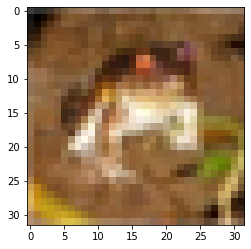

In [5]:
plt.imshow(x_train[0])


The range of x_train for each picture is from 0 to 225.

In [6]:
np.min(x_train),np.max(x_train)

(0, 255)

Let's scale x_train and x_test

In [7]:
x_train = x_train/255
x_test = x_test/255

To feed into the network, et's flat X to change the matrix shape to a vector. 

Check the flatten function and the shape.

In [8]:
x_train[0].flatten().shape

(3072,)

Next, let's reshape it to a vector with 3072 rows and 1 column.

In [9]:
x_train[0].flatten().reshape(3072, 1).shape

(3072, 1)

Create for loops to flatten the X matrix. The label vectors are temporarily stored in Y.

In [10]:
# X will temp store flattened matrices
X = []
for x in x_train:
  X.append(x.flatten().reshape(3072, 1))

# Y will temp store one-hot encoded label vectors
Y = []
for y in y_train:
  temp_vec = np.zeros((10, 1))
  temp_vec[y][0] = 1.0
  Y.append(temp_vec)

# Our data will be stored as a list of tuples. 
train_data = [p for p in zip(X, Y)]

In [11]:
p = train_data[0]
print(p[1])

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


Check the shape of p and the shape of training data.

In [12]:
p[0].shape

(3072, 1)

In [13]:
np.array(train_data).shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


(50000, 2)

Do the same work to test data.

In [14]:
X = []
for x in x_test:
  X.append(x.flatten().reshape(3072, 1))

Y = []
for y in y_test:
  temp_vec = np.zeros((10, 1))
  temp_vec[y][0] = 1.0
  Y.append(temp_vec)

test_data = [p for p in zip(X, Y)]

## Algorithm Steup

### Activation Function 
Define activation function and their first derivative

The first derivative of the sigmoid function is:
$$\sigma'(z)=\sigma(z)(1-\sigma(z))$$

In [15]:
def sigmoid(z):
  return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
  return sigmoid(z)*(1.0-sigmoid(z))


The first derivative of the tanh function is:
$$\text{tanh}'(z) = 1- (\text{tanh}(z))^2$$

In [ ]:
def tanh(z):
  return np.tanh(z)

def tanh_prime(z):
  return 1.0 - (np.tanh(z))**2


The first derivative of the relu function is:
$$\text{relu}'(z) = \text{where}(z > 0, 1.0, 0)$$

In [ ]:
def relu(z):
  np.maximum(0, z)

def relu_prime(z):
  return np.where(z > 0, 1.0, 0)

## Loss Function
The cost function is:
$$C(w,b;x,y)=\frac{1}{2}\sum_{i=1}^n(\alpha_i^L-y_i)^2$$

In [ ]:
def mse(a, y):
  return .5*sum((a[i]-y[i])**2 for i in range(10))[0]

### Initial weights and bias.  
The number of nodes in the four layers is 3072, 60, 60, 10, respectively. Thus, the dimentions of weights are (60, 3027), (60,60), (10,60). The dimensions of bias are (60,1), (60,1), (10,1).

In [16]:
def initialize_weights(layers = [3072, 60, 60, 10]):
  W = [[0.0]]
  B = [[0.0]]
  for i in range(1, len(layers)):
    w_temp = np.random.randn(layers[i], layers[i-1])*np.sqrt(2/layers[i-1])
    b_temp = np.random.randn(layers[i], 1)*np.sqrt(2/layers[i-1])

    W.append(w_temp)
    B.append(b_temp)
  return W, B

In [17]:
W, B = initialize_weights()

In [18]:
x, y = train_data[0]

### Forward Propagation

Output of the first layer

In [19]:
a0 = x
z1 = (W[1] @ a0) + B[1]
a1 = sigmoid(z1)

In [20]:
a1.shape

(60, 1)

Output of the second layer

In [21]:
z2 = (W[2] @ a1) + B[2]
a2 = sigmoid(z2)
print(a2.shape)

(60, 1)


Output of the third layer.

In [22]:
z3 = (W[3] @ a2) + B[3]
a3 = sigmoid(z3)
print(a3.shape)

(10, 1)


The shape of the output of the three layers are (60,1), (60,1), (10,1), respectively, meaning that our function works well.

Record the output of hidden layers and output layer.

In [23]:
W, B = initialize_weights(layers=[3072, 60, 60, 10])
x, y = train_data[0]
Z = [[0.0]]
A = [x]
L = len(B)
for i in range(1, L):
  z = (W[i] @ A[i-1]) + B[i]
  a = sigmoid(z)

  Z.append(z)
  A.append(a)

The shape of the output layer.

In [24]:
A[-1].shape

(10, 1)

In [25]:
A[-1]

array([[0.30849575],
       [0.6590959 ],
       [0.72038567],
       [0.77423845],
       [0.79782488],
       [0.58541553],
       [0.45312934],
       [0.72169938],
       [0.52324117],
       [0.53288498]])

## output error
Store delta values (**output error**) by creating a dictionary.
$$\delta^{\ell-1} = \nabla_{a^{\ell-1}}\ C \otimes \sigma' (z^{\ell-1})$$


In [26]:
deltas = dict()
delta_last = (A[-1] - y)*sigmoid_prime(Z[-1])
deltas[L-1] = delta_last

In [27]:
deltas[L-1]

array([[0.0658102 ],
       [0.14809127],
       [0.1451074 ],
       [0.13533167],
       [0.12868942],
       [0.1420828 ],
       [0.11228687],
       [0.14495288],
       [0.13052766],
       [0.13264497]])


## Neuron Error
For $\ell = L-2,\cdots,1$, based on output error, the neuron error is: $$\delta^{\ell}=\bigg(\big(w^{\ell+1}\big) ^T\delta^{\ell+1}\bigg) \otimes\sigma'(z^{\ell})$$

In [28]:
for l in range(L-2, 0, -1):
  deltas[l] = (W[l+1].T @ deltas[l+1])*sigmoid_prime(Z[l])

The shape of each layers.

In [29]:
deltas[1].shape

(60, 1)

In [30]:
deltas[2].shape

(60, 1)

In [31]:
deltas[3].shape

(10, 1)

The shape of the outputs of each layer is right, meaning that our functions for the output error and the neuron error work well.

 Setup learning rate.

In [32]:
alpha = 0.04

## Update weight and bias

In [33]:
for i in range(1, 4):
  W[i] = W[i] - alpha*deltas[i]@A[i-1].T
  B[i] = B[i] - alpha*deltas[i]

## Feed forward and make predictions.

In [34]:
def forward_pass(W, B, p, predict_vector = False):
  Z =[[0.0]]
  A = [p[0]]
  L = len(W)
  for i in range(1, L):
    z = (W[i] @ A[i-1]) + B[i]
    a = sigmoid(z)

    Z.append(z)
    A.append(a)

  if predict_vector == True:
    return A[-1]
  else:
    return Z, A


Neuron Errors Storage

In [35]:
def deltas_dict(W, B, p):
  Z, A = forward_pass(W, B, p)
  L = len(W)
  deltas = dict()
  deltas[L-1] = (A[-1] - p[1])*sigmoid_prime(Z[-1])
  for l in range(L-2, 0, -1):
    deltas[l] = (W[l+1].T @ deltas[l+1]) * sigmoid_prime(Z[l])

  return A, deltas


Define loss function.

In [36]:
def MSE(W, B, data):
  c = 0.0
  for p in data:
    a = forward_pass(W, B, p, predict_vector=True)
    c += mse(a, p[1]) # error between a and y
  return c/len(data)

## Algorithm implementation

Calculate initial loss.

In [37]:
W, B = initialize_weights()
print(f"Initial Cost = {MSE(W, B, train_data)}")

Initial Cost = 0.9934194082147363


Predicted Value = 7
Actual Value = [9]


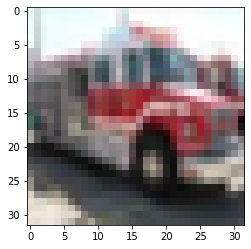

In [41]:
i = np.random.randint(0, len(x_test))
prediction = np.argmax(forward_pass(W, B, test_data[i], predict_vector=True))
print(f"Predicted Value = {prediction}")
print(f"Actual Value = {y_test[i]}")
plt.imshow(x_test[i], cmap="gray")
plt.show()

The predicted value is not consistent with the actual value. 

Define a stochastic gradient descent function with a learning rate $\alpha = 0.04$ and epochs (the number of iterations) = 3.

In [48]:
def stochastic_gradient_descent(W, B, data, alpha = 0.04, epochs = 3):
  L = len(W)
  print(f"Initial Cost = {MSE(W, B, data)}")
  for k in range(epochs):
    for p in data:
      A, deltas = deltas_dict(W, B, p)
      for i in range(1, L):
        W[i] = W[i] - alpha*deltas[i]@A[i-1].T
        B[i] = B[i] - alpha*deltas[i]
    print(f"{k} Cost = {MSE(W, B, data)}")

In [49]:
stochastic_gradient_descent(W, B, train_data)

Initial Cost = 0.9934194082147363
0 Cost = 3.28662926871759e-05
1 Cost = 1.5939636222433912e-05
2 Cost = 1.0451486149977837e-05


Epoch's costs progressively decline. The training procedure is effective.

We may combine all of the functions to form a class. Meanwhile, we develop another approach for optimizing the algorithm, mini-batch gradient descent.

In [50]:
# everything is the same, except for the self
class MultilayerPerceptron():
  
  def __init__(self, layers = [3072, 60, 60, 10]):
    self.layers = layers
    self.L = len(self.layers)
    self.W =[[0.0]]
    self.B = [[0.0]]
    for i in range(1, self.L):
      w_temp = np.random.randn(self.layers[i], self.layers[i - 1])*np.sqrt(2/self.layers[i - 1])
      b_temp = np.random.randn(self.layers[i], 1)*np.sqrt(2/self.layers[i-1])

      self.W.append(w_temp)
      self.B.append(b_temp)

  def reset_weights(self, layers = [3072, 60, 60, 10]):
    self.layers = layers
    self.L = len(self.layers)
    self.W = [[0.0]]
    self.B = [[0.0]]
    for i in range(1, self.L):
      w_temp = np.random.randn(self.layers[i], self.layers[i - 1])*np.sqrt(2/self.layers[i - 1])
      b_temp = np.random.randn(self.layers[i], 1)*np.sqrt(2/self.layers[i-1])

      self.W.append(w_temp)
      self.B.append(b_temp)


  def forward_pass(self, p, predict_vector = False):
    Z =[[0.0]]
    A = [p[0]]
    for i in range(1, self.L):
      z = (self.W[i] @ A[i - 1]) + self.B[i]
      a = sigmoid(z)
      Z.append(z)
      A.append(a)

    if predict_vector == True:
      return A[-1]
    else:
      return Z, A

  def MSE(self, data):
    c = 0.0
    for p in data:
      a = self.forward_pass(p, predict_vector=True)
      c += mse(a, p[1])
    return c/len(data)

  def deltas_dict(self, p):
    Z, A = self.forward_pass(p)
    deltas = dict()
    deltas[self.L - 1] = (A[-1] - p[1])*sigmoid_prime(Z[-1])
    for l in range(self.L - 2, 0, -1):
      deltas[l] = (self.W[l+1].T @ deltas[l+1]) * sigmoid_prime(Z[l])

    return A, deltas

  def stochastic_gradient_descent(self, data, alpha = 0.04, epochs = 3):
    print(f"Initial Cost = {self.MSE(data)}")
    for k in range(epochs):
      for p in data:
        A, deltas = self.deltas_dict(p)
        for i in range(1, self.L):
          self.W[i] = self.W[i] - alpha*deltas[i]@A[i - 1].T
          self.B[i] = self.B[i] - alpha*deltas[i]
    print(f"{k} Cost = {self.MSE(data)}")

  def mini_batch_gradient_descent(self, data, batch_size = 15, alpha = 0.04, epochs = 3):
    print(f"Initial Cost = {self.MSE(data)}")
    data_length = len(data)
    for k in range(epochs):
      for j in range(0,data_length-batch_size,batch_size):
        delta_list = []
        A_list = []
        for p in data[j:j + batch_size]:
          A, deltas = self.deltas_dict(p)
          A_list.append(A)

          for i in range(1, self.L):
            self.W[i] = self.W[i] - (alpha/batch_size)*sum(da[0][i]@da[1][i - 1].T for da in zip(delta_list, A_list))
            self.B[i] = self.B[i] - (alpha/batch_size)*sum(deltas[i] for deltas in delta_list)
    print(f"{k} Cost = {self.MSE(data)}")

## stochastic gradient descent strategy vs. mini-batch gradient descent strategy 

In [51]:
net = MultilayerPerceptron(layers = [3072, 60, 60, 10])

In [52]:
net.stochastic_gradient_descent(train_data)

Initial Cost = 1.3039802952116155
2 Cost = 1.1002873201495064e-05


In [53]:
net.mini_batch_gradient_descent(train_data)

Initial Cost = 1.1002873201495064e-05
2 Cost = 1.1002873201495064e-05


In [54]:
net.MSE(test_data)

1.0954904804630968e-05

 The mini-batch gradient descent stragety generates smaller cost than the stochastic gradient descent stragety, but it takes longer.

## Increase nodes in hidden layers
setup 120 nodes for both hidden layers, and then make a comparison.



In [55]:
net = MultilayerPerceptron(layers = [3072, 120, 120, 10])

In [56]:
net.stochastic_gradient_descent(train_data)

Initial Cost = 1.5197036747668118
2 Cost = 5.884029933829305e-06


In [57]:
net.mini_batch_gradient_descent(train_data)

Initial Cost = 5.884029933829305e-06
2 Cost = 5.884029933829305e-06


In [58]:
net.MSE(test_data)

5.834653831432273e-06

When the number of nodes in the hidden layers is increased, the overall cost gets smaller than before. 

## Reference
Patrikar, S. (2019, October 1). Batch, Mini Batch & Stochastic Gradient Descent | By Sushant Patrikar | Towards Data Science. Medium. https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a.

S. (2017, December 8). Neural Network Tutorial - Artificial Intelligence | Deep Learning | Edureka. Edureka. https://www.edureka.co/blog/neural-network-tutorial/.